[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]] [  3.98266538e+00   1.63032807e-02   4.60974979e-04   1.60958710e-03]


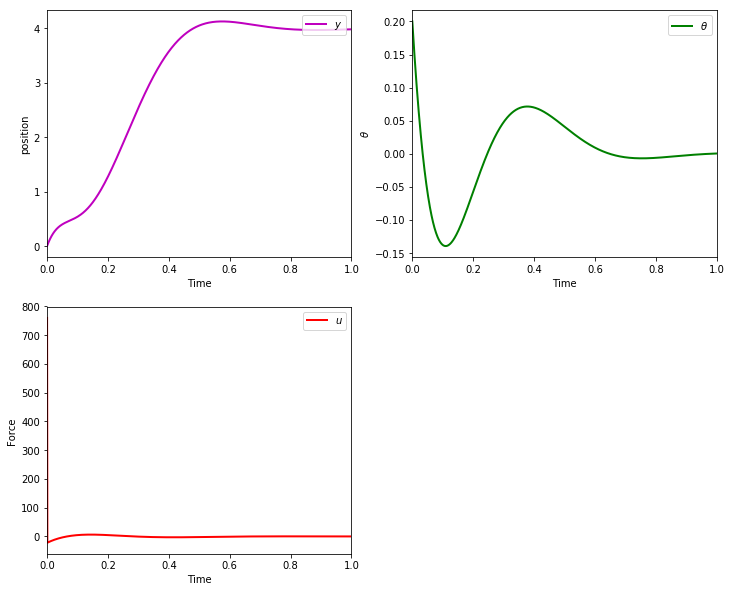

In [14]:
import matplotlib.animation as animation
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.linalg

m, M = 1, 5
L = 2
g = -10
d = 1

s = 1 # pendulum up -1 when pendulum down
s = -1

A = np.matrix([[0,1,0,0],
              [0, -d/M, -m*g/M, 0],
              [0, 0, 0, 1],
              [0, -s*d/(M*L), -s*(M+m)*g/(M*L), 0]])
B = np.matrix([0,1/M,0,s/(M*L)]).T
# x is defined as [y,v,theta,q]
C = np.diag((1,1,1,1))
D = np.zeros((4,1))
x0 = np.array([0, 0, 0, 0])
end_loc = [0.1, 1, 10, 20]
# time limit
# n, timespan = 300,24
# timeset = np.linspace(0, timespan, n)

def dynamics(x, u):
    p,v,theta,dtheta = x[0], x[1], x[2], x[3]
    Sy = np.sin(theta)
    Cy = np.cos(theta)
    D = m*L*L*(M+m*(1-Cy**2))
    a = (1/D)*(-m**2*L**2*g*Cy*Sy + m*L**2*(m*L*dtheta**2*Sy - d*v)) + m*L*L*(1/D)*u
    ddtheta = (1/D)*((m+M)*m*g*L*Sy - m*L*Cy*(m*L*dtheta**2*Sy - d*v)) - m*L*Cy*(1/D)*u #+.01*randn;
    
    dx = np.asarray([v, a,dtheta, ddtheta])
    return dx

def lqr_con(A,B,Q,R):
    """Solve the continuous time lqr controller.

    dx/dt = A x + B u

    cost = integral x.T*Q*x + u.T*R*u
    """
    #ref Bertsekas, p.151

    #first, try to solve the ricatti equation
    X = np.matrix(scipy.linalg.solve_continuous_are(A, B, Q, R))

    #compute the LQR gain
    K = np.matrix(scipy.linalg.inv(R)*(B.T*X))

    eigVals, eigVecs = scipy.linalg.eig(A-B*K)

    return K, X, eigVals

Q = np.diag((1,1,10,100)) 
R = np.matrix(0.0001)
K2, X, eigVals = lqr_con(A,B,Q,R)
timeset = np.linspace(0,1,1001)
dt = 10e-3
x0 = np.array([-3,0,np.pi + 0.1, 0])
x0= np.array([0,0,0.2,0])
# x0 = np.array([-3,0, 0, 0])

yout, xout = [np.dot(C,x0)],[x0]
goal = np.array([1,0,np.pi,0])
goal = np.array([4,0,0,0])

theta, Y = [],[]
U = []
for t in timeset:
#     dxi = np.dot(A,xout[-1]) + np.dot(B, ui)
    ui = - np.dot(K2, xout[-1]- goal)
    U.append(ui[0,0])
    dxi = dynamics(xout[-1], ui)
    xi = dt * dxi + xout[-1]
    xout.append(xi)
    yout.append(np.dot(C,xi))
    theta.append(xi[2])
    Y.append(xi[0])

print(C, xi)
yout = np.matrix(yout[1:])


# plt.plot(timeset, yout[:,0], label='y_0')
# # plt.plot(timeset, yout[:,2], label='theta')
# plt.legend()
# plt.show()

# plotXU============================                       

import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))

plt.subplot(221)
plt.plot(timeset,yout[:,0],'m',lw=2)
plt.legend([r'$y$'],loc=1)
plt.ylabel('position')
plt.xlabel('Time')
plt.xlim(timeset[0],timeset[-1])

plt.subplot(222)
plt.plot(timeset,yout[:,2],'g',lw=2)
plt.legend([r'$\theta$'],loc=1)
plt.ylabel(r'$\theta$')
plt.xlabel('Time')
plt.xlim(timeset[0],timeset[-1])

plt.subplot(223)
plt.plot(timeset,U,'r',lw=2)
plt.legend([r'$u$'],loc=1)
plt.ylabel('Force')
plt.xlabel('Time')
plt.xlim(timeset[0],timeset[-1])

# plt.subplot(224)
# plt.plot(timeset,theta_a.value,'y',lw=2)
# plt.plot(timeset,qa.value,'c',lw=2)
# plt.legend([r'$\theta$',r'$q$'],loc=1)
# plt.ylabel('Angle')
# plt.xlabel('Time')
# plt.xlim(timeset[0],timeset[-1])

plt.rcParams['animation.html'] = 'html5'

x1 = yout[:,0]
x1 = Y
y1 = np.zeros(len(timeset))

#suppose that l = 1
x2 = L*np.sin(yout[:,2])+x1
x2b = L*np.sin(yout[:,2])+x1
y2 = L*np.cos(yout[:,2])-y1
y2b = L*np.cos(yout[:,2])-y1

x2 = L*np.sin(theta)+x1
x2b = L*np.sin(theta)+x1
y2 = L*np.cos(theta)-y1
y2b = L*np.cos(theta)-y1


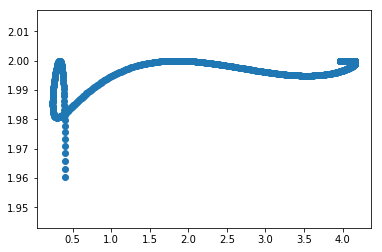

In [8]:
plt.scatter(x2, y2)
# plt.scatter(x1,y1)

ValueError: Invalid file object: <_io.BufferedReader name=65>

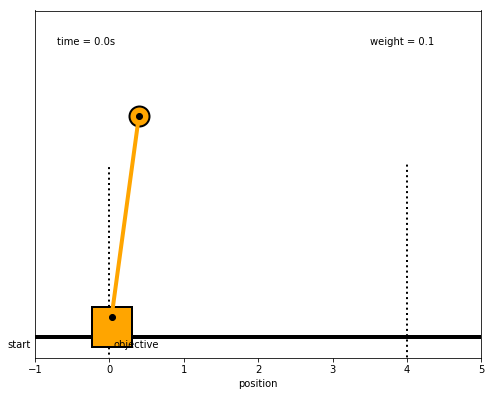

In [12]:

fig = plt.figure(figsize=(8,6.4))
ax = fig.add_subplot(111,autoscale_on=False,\
                     xlim=(-1,5),ylim=(-0.4,3))
ax.set_xlabel('position')
ax.get_yaxis().set_visible(False)

crane_rail, = ax.plot([-2.0,5.0],[-0.2,-0.2],'k-',lw=4)
start, = ax.plot([0,-0],[-1.5,1.5],'k:',lw=2)
objective, = ax.plot([4,4],[-0.5,1.5],'k:',lw=2)
mass1, = ax.plot([],[],linestyle='None',marker='s',\
                 markersize=40,markeredgecolor='k',\
                 color='orange',markeredgewidth=2)
mass2, = ax.plot([],[],linestyle='None',marker='o',\
                 markersize=20,markeredgecolor='k',\
                 color='orange',markeredgewidth=2)
line, = ax.plot([],[],'o-',color='orange',lw=4,\
                markersize=6,markeredgecolor='k',\
                markerfacecolor='k')
time_template = 'time = %.1fs'
time_text = ax.text(0.05,0.9,'',transform=ax.transAxes)
wgt_template = 'weight = %.1f'
wgt_text = ax.text(0.75,0.9,'',transform=ax.transAxes)
start_text = ax.text(-1.06,-0.3,'start',ha='right')
end_text = ax.text(0.06,-0.3,'objective',ha='left')


m2 = np.ones(len(timeset))*0.1

def init():
    mass1.set_data([],[])
    mass2.set_data([],[])
    line.set_data([],[])
    time_text.set_text('')
    wgt_text.set_text('')
    return line, mass1, mass2, time_text, wgt_text

def animate(i):
    mass1.set_data([x1[i]],[y1[i]-0.1])
    mass2.set_data([x2b[i]],[y2b[i]])
    line.set_data([x1[i],x2[i]],[y1[i],y2[i]])
    time_text.set_text(time_template % timeset[i])
    wgt_text.set_text(wgt_template % m2[i])
    return line, mass1, mass2, time_text, wgt_text

ani_a = animation.FuncAnimation(fig, animate, \
         np.arange(1,len(timeset)), \
         interval=40,blit=False,init_func=init)

# requires ffmpeg to save mp4 file
#  available from https://ffmpeg.zeranoe.com/builds/
#  add ffmpeg.exe to path such as C:\ffmpeg\bin\ in
#  environment variables
ani_a.save('Pendulum_Control.html')

plt.show()
